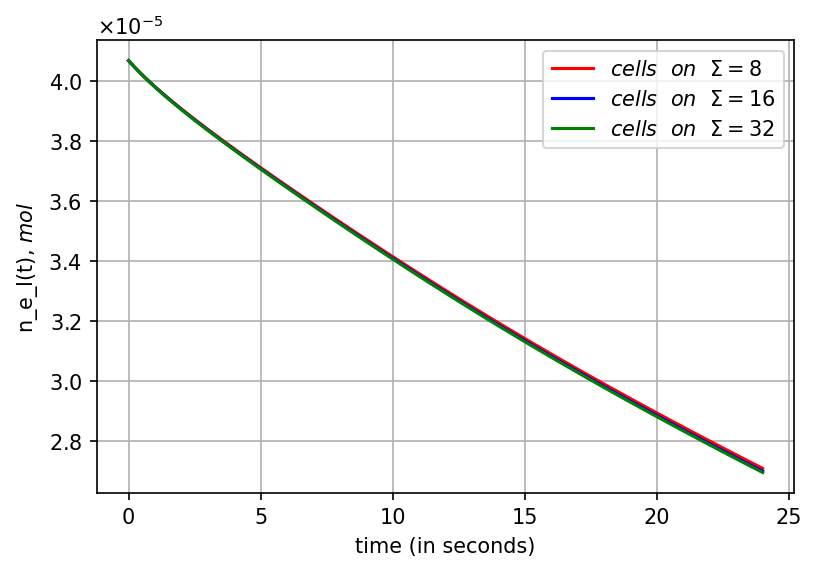

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Read the CSV file ## current file in mesh2
data = pd.read_csv('../convergence_study/mesh1/flux_drop.csv', delimiter=', ', engine='python') ## mesh 1
data2 = pd.read_csv('../convergence_study/mesh2/flux_drop.csv', delimiter=', ', engine='python') ## mesh 2
data3 = pd.read_csv('../convergence_study/mesh3/flux_drop.csv', delimiter=', ', engine='python') ### mesh3 
# Extract the columns you want to plot
x = data['t(in s)']
f = data['flux (mol/ms)']
y = data['n_e_l(t)(mol)']
z = data['c_e_g(t)(mol/m3)']
f2 = data2['flux (mol/ms)']
y2 = data2['n_e_l(t)(mol)']
z2 = data2['c_e_g(t)(mol/m3)']
f3 = data3['flux (mol/ms)']
y3 = data3['n_e_l(t)(mol)']
z3 = data3['c_e_g(t)(mol/m3)']

fig, ax = plt.subplots(1,1,dpi =150)
axs = [ax]

# Use ScalarFormatter to format the x-axis ticks
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, -5))  # Set the power limits to (-3, -3) to keep 10^-3 at the corner
#axs[0].xaxis.set_major_formatter(formatter)
axs[0].yaxis.set_major_formatter(formatter)

# Create a line plot
axs[0].plot(x[:24000], y[:24000], marker='', ls='-', color='red', label = '$cells \ \ on \ \ {\Sigma} = 8$')
axs[0].plot(x[:24000], y2[:24000], marker='', ls='-', color='blue', label = '$cells \ \ on \ \  {\Sigma} = 16$')  
axs[0].plot(x[:24000], y3[:24000], marker='', ls='-', color='green', label = '$cells \ \ on \ \ {\Sigma} = 32$')

# Add labels and title
# plt.ylim(0,0.8E-05)
axs[0].set_xlabel('time (in seconds)')
axs[0].set_ylabel('n_e_l(t), $mol$')
axs[0].legend()
axs[0].grid()

#fig.savefig('n_e_l.pdf', bbox_inches='tight')
# plt.show()

# Figure 12(a)

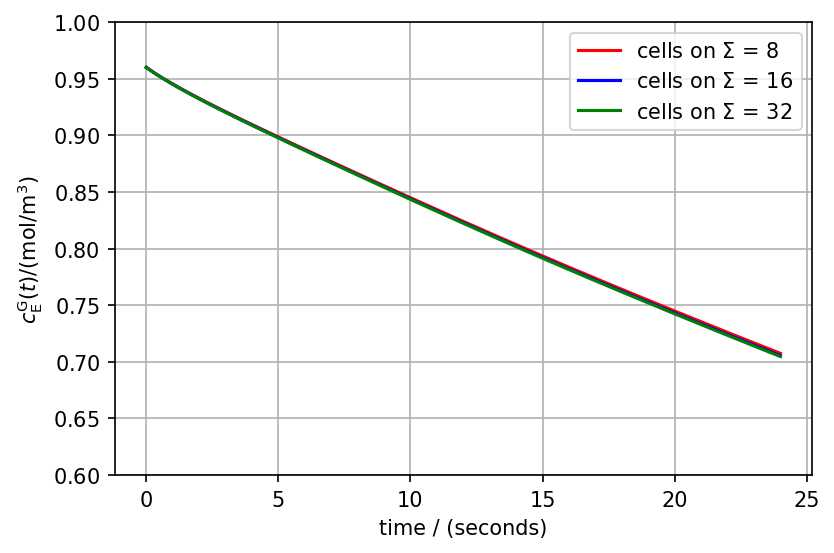

In [28]:
fig, ax = plt.subplots(1,1,dpi =150)
axs = [ax]

# Create a line plot
axs[0].plot(x[:24000], z[:24000], marker='', ls='-', color='red', label = 'cells on ${\Sigma}$ = 8')
axs[0].plot(x[:24000], z2[:24000], marker='', linestyle='-', color='blue', label = 'cells on ${\Sigma}$ = 16') 
axs[0].plot(x[:24000], z3[:24000], marker='', ls='-', color='green', label = 'cells on ${\Sigma}$ = 32')

formatter.set_powerlimits((0, -1))
#axs[0].xaxis.set_major_formatter(formatter)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_ylim(0.6,1.0)
#axs[0].set_xlim(0.0,0.16)
axs[0].set_xlabel('time / (seconds)')
axs[0].set_ylabel('$c_{\mathrm{E}}^{\mathrm{G}} (t) / \mathrm{(mol/m^3)}$')
axs[0].grid()
axs[0].legend()
fig.savefig('../figures/conc_convergenceStudy.pdf', bbox_inches='tight' )
# plt.show()

# Figure 12(b)

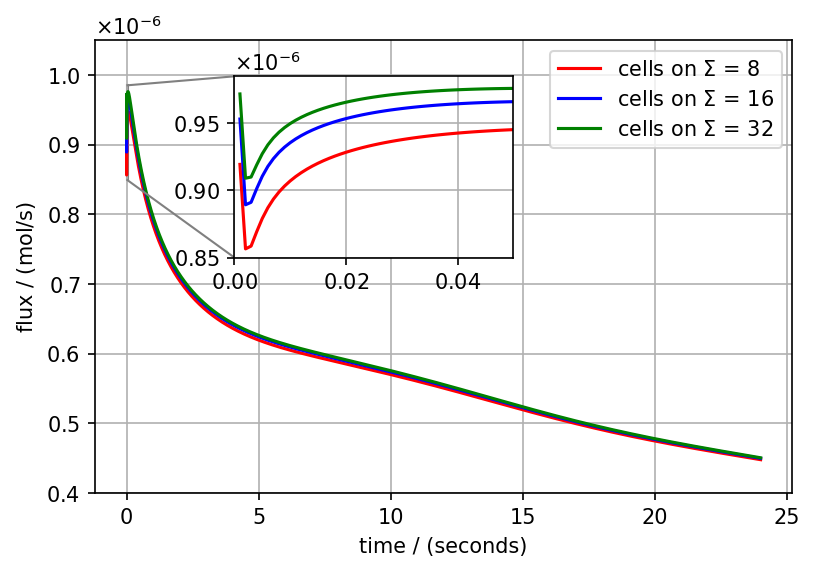

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, ax = plt.subplots(1,1,dpi =150)
axs = [ax]

# Create a line plot
flux_in_mol_s = [i * 0.060 for i in f]
flux_in_mol_s_2 = [i * 0.060 for i in f2]
flux_in_mol_s_3 = [i * 0.060 for i in f3]
axs[0].plot(x[:24000], flux_in_mol_s[:24000], marker='', ls='-', color='red', label = 'cells on ${\Sigma}$ = 8')
axs[0].plot(x[:24000], flux_in_mol_s_2[:24000], marker='', ls='-', color='blue', label = 'cells on ${\Sigma}$ = 16')  # Adjust marker, linestyle, and color as needed
axs[0].plot(x[:24000], flux_in_mol_s_3[:24000], marker='', ls='-', color='green', label = 'cells on ${\Sigma}$ = 32')

# Create an inset axis
inset_ax = axs[0].inset_axes([0.2, 0.52, 0.4, 0.4])
inset_ax.plot(x[:24000], flux_in_mol_s[:24000], marker='', ls='-', color='red', label='cells on ${\Sigma}$ = 8')
inset_ax.plot(x[:24000], flux_in_mol_s_2[:24000], marker='', ls='-', color='blue', label='cells on ${\Sigma}$ = 16')
inset_ax.plot(x[:24000], flux_in_mol_s_3[:24000], marker='', ls='-', color='green', label='cells on ${\Sigma}$ = 32')
inset_ax.set_xlim(0, 0.050)
inset_ax.set_ylim(0.850E-06, 0.985E-06)
inset_ax.grid()
inset_ax.yaxis.tick_left()
inset_ax.xaxis.set_major_formatter(formatter)
inset_ax.yaxis.set_major_formatter(formatter)
# Mark the inset area on the main plot
mark_inset(axs[0], inset_ax, loc1=2, loc2=3, fc="none", ec="0.5")

# Add labels and title
formatter.set_powerlimits((0, -1))
#axs[0].xaxis.set_major_formatter(formatter)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_ylim(0.4E-06, 1.05E-06)
axs[0].set_xlabel('time / (seconds)')
axs[0].set_ylabel('flux / ($\mathrm{mol/s}$)')
axs[0].legend()
axs[0].grid()

# Save the figure
fig.savefig('../figures/flux_convergenceStudy.pdf', bbox_inches='tight')

# Display the plot
plt.show()


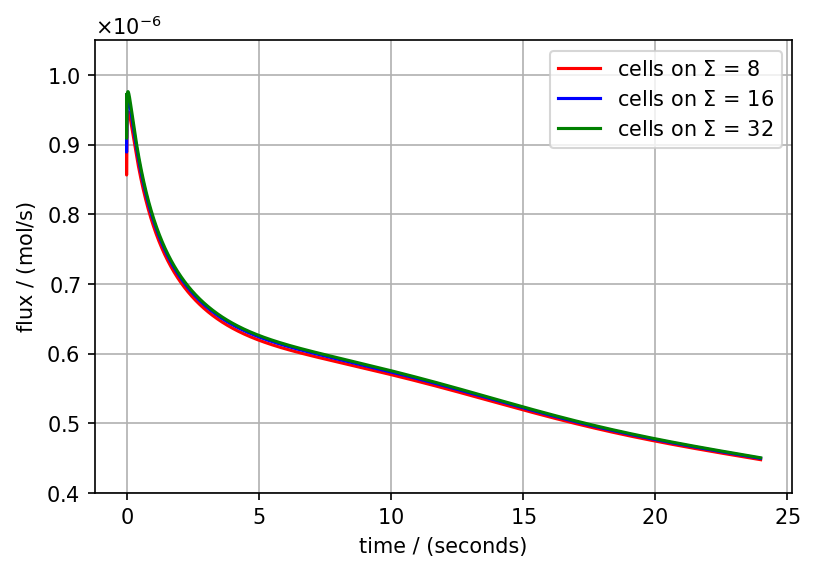

In [30]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,1,dpi =150)
axs = [ax]

# Create a line plot
flux_in_mol_s = [i * 0.060 for i in f]
flux_in_mol_s_2 = [i * 0.060 for i in f2]
flux_in_mol_s_3 = [i * 0.060 for i in f3]
axs[0].plot(x[:24000], flux_in_mol_s[:24000], marker='', ls='-', color='red', label = 'cells on ${\Sigma}$ = 8')
axs[0].plot(x[:24000], flux_in_mol_s_2[:24000], marker='', ls='-', color='blue', label = 'cells on ${\Sigma}$ = 16')  
axs[0].plot(x[:24000], flux_in_mol_s_3[:24000], marker='', ls='-', color='green', label = 'cells on ${\Sigma}$ = 32')

formatter.set_powerlimits((0, -1))
axs[0].xaxis.set_major_formatter(formatter)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_ylim(0.4E-06,1.05E-06)
axs[0].set_xlabel('time / (seconds)')
axs[0].set_ylabel('flux / ($\mathrm{mol/s}$)')
axs[0].legend()
axs[0].grid()

#fig.savefig('../figures/flux9L_convergenceStudy.pdf', bbox_inches='tight')
# plt.show()

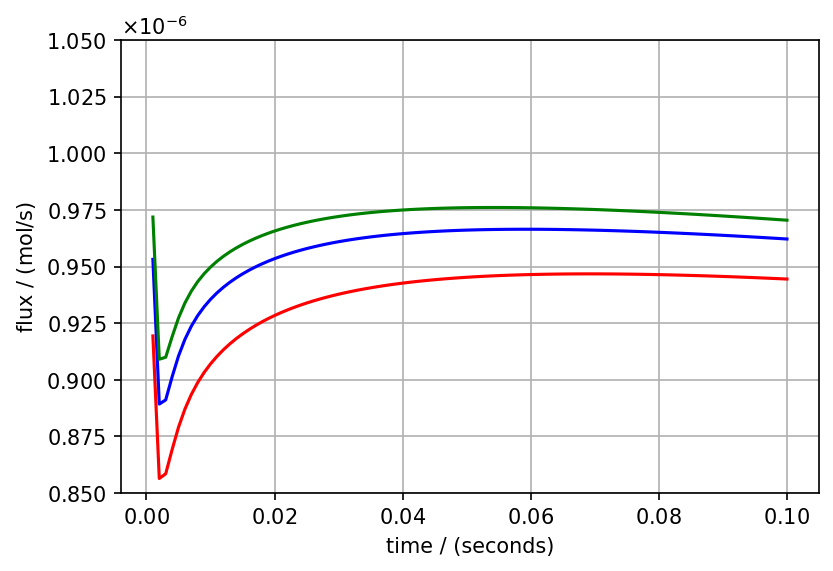

In [31]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,1,dpi =150)
axs = [ax]

# Create a line plot
flux_in_mol_s = [i * 0.060 for i in f]
flux_in_mol_s_2 = [i * 0.060 for i in f2]
flux_in_mol_s_3 = [i * 0.060 for i in f3]
axs[0].plot(x[:100], flux_in_mol_s[  :100], marker='', ls='-', color='red', label = 'cells on ${\Sigma}$ = 8')
axs[0].plot(x[:100], flux_in_mol_s_2[:100], marker='', ls='-', color='blue', label = 'cells on ${\Sigma}$ = 16')  
axs[0].plot(x[:100], flux_in_mol_s_3[:100], marker='', ls='-', color='green', label = 'cells on ${\Sigma}$ = 32')
# Add labels and title
formatter.set_powerlimits((0, -1))
axs[0].xaxis.set_major_formatter(formatter)
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_ylim(0.85E-06,1.05E-06)
axs[0].set_xlabel('time / (seconds)')
axs[0].set_ylabel('flux / ($\mathrm{mol/s}$)')
#axs[0].legend()
axs[0].grid()

#fig.savefig('../figures/convergenceStudy_zoom.pdf', bbox_inches='tight')
# plt.show()